[Stephan et al. (2019)](https://doi.org/10.3847/1538-4357/ab1c60) analyzed Mo isotopic compositions of multiple SiC grains.
Linear regressions were then used to study *s*-process nucleosynthesis.

Let us search this dataset, plot it with correlated uncertainties, and perform a linear regression.
To plot correlated uncertainties and perform the linear regression, 
the [`CEREsFit`](https://github.com/galactic-forensics/CEREsFit/) will be used. 
More details on `CEREsFit` can be found on it's website.

In [1]:
from ceresfit import LinReg  # to calculate linear regression
from ceresfit.unc_calc import error_bar_positions  # to plot correlated error bars
import matplotlib.pyplot as plt
import numpy as np

from pgdtools import pgd

## Filter the data

We now want to filter out the Stephan et al. (2019) dataset from the PGD database.
We first search for the right reference and will then filter out the data.
Finally, we will see what kind of grain types are in there, and filter further if needed.

In [3]:
ref = pgd.reference.search("Stephan, 2019")

References found:
- Liu et al. (2019) ApJ 881:28
- Stephan et al. (2019) ApJ 877:101


['Liu et al. (2019) ApJ 881:28', 'Stephan et al. (2019) ApJ 877:101']

In [5]:
# So we only want the Stephan reference, let's filter additionally for the 877:101
ref = pgd.reference.search("Stephan, 2019, 877:101")

References found:
- Stephan et al. (2019) ApJ 877:101


In [6]:
pgd.filter.reference(ref)

# show the grain types that are available
pgd.info.number_of_grains
pgd.info.pgd_types;

Number of grains in current selection: 18
Currently available PGD types in filtered database:
- M
- AB


So it looks like we only have mainstream and AB data in here.

## Plot the data with correlated uncertainties and perform a linear regression

As an example, let us have a look at the δ(<sup>100</sup>Mo/<sup>96</sup>Mo) vs. δ(<sup>92</sup>Mo/<sup>96</sup>Mo) plot.
Of course, you can download this notebook and simply replace below definitions to create any of the other plots,
or create subplots, etc.

After getting the data, we will plot them with correlated uncertainties. 
The uncertainty plotting will make use of a routine that currently exists in CEREsFit.
We then perform a linear regression and show the results as well.

In [17]:
x_rat = ("Mo-92", "Mo-96")
y_rat = ("Mo-100", "Mo-96")
xdat, xunc, ydat, yunc, corr = pgd.data.ratio_xy(
    x_rat, y_rat, simplify_unc=True
)  # let's use symmetric errors

# linear regression
reg = LinReg(xdat, xunc, ydat, yunc, rho=corr)

Slope: 0.983 ± 0.008
Intercept: 3.092 ± 6.814
MSWD: 9.341


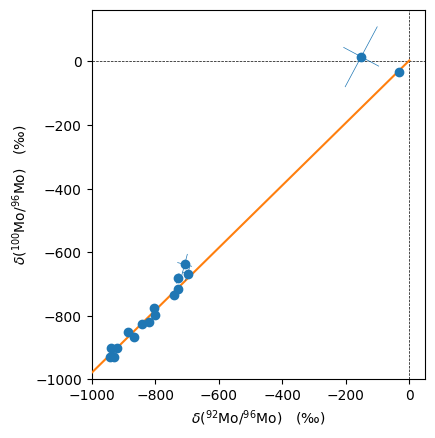

In [33]:
# plot
fig, ax = plt.subplots(1, 1)

xerr, yerr = error_bar_positions(
    xdat.to_numpy(), xunc.to_numpy(), ydat.to_numpy(), yunc.to_numpy(), corr.to_numpy()
)

ax.axhline(0, color="black", linewidth=0.5, linestyle="--")
ax.axvline(0, color="black", linewidth=0.5, linestyle="--")

ax.plot(xdat, ydat, "o", color="tab:blue", zorder=30)
for xpos, ypos in zip(xerr, yerr):
    ax.plot(xpos, ypos, "-", color="tab:blue", linewidth=0.5, zorder=29)

# plot regression line from -1000 to 0
ax.plot(*reg.regression_line(np.array([-1000, 0])), color="tab:orange", zorder=20)

ax.set_xlabel(pgd.format.ratio(x_rat))
ax.set_ylabel(pgd.format.ratio(y_rat))

# cut plot at -1000
ax.set_xlim(-1000)
ax.set_ylim(-1000)

ax.set_aspect(1)

# finally, print the regression results
print(f"Slope: {reg.slope[0]:.3f} ± {reg.slope[1]:.3f}")
print(f"Intercept: {reg.intercept[0]:.3f} ± {reg.intercept[1]:.3f}")
print(f"MSWD: {reg.mswd:.3f}")

Well, the results are slightly different from Stephan et al. (2019).
However, we here included the AB grain data and did not filter it out before applying the regression.
If you would like to get the same results as Stephan et al. (2019), you cold do this as an exercise!

- Plot Mainstream and AB data distinct from each other
- Perform the linear regression on the Mainstream data only
- Compare the results with Stephan et al. (2019)